In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.metrics import confusion_matrix

In [38]:
# make a fix file size
fixed_size  = tuple((48,48))

# no of trees for Random Forests
num_tree = 100

# bins for histograms 
bins = 8

# train_test_split size
test_size = 0.1

# seed for reproducing same result 
seed = 9 

In [39]:
#train path 
train_path = "data/train"

#test path 
test_path = "data/test"

In [40]:
# # features description -1:  Hu Moments

# def fd_hu_moments(image):
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     feature = cv2.HuMoments(cv2.moments(image)).flatten()
#     return feature

In [41]:
# # feature-descriptor -2 Haralick Texture 

# def fd_haralick(image):
#     # conver the image to grayscale
#     gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#     # Ccompute the haralick texture fetature ve tor 
#     haralic = mahotas.features.haralick(gray).mean(axis=0)
#     return haralic


In [42]:
# # feature-description -3 Color Histogram

# def fd_histogram(image, mask=None):
#     # conver the image to HSV colors-space
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#     #COPUTE THE COLOR HISTPGRAM
#     hist  = cv2.calcHist([image],[0,1,2],None,[bins,bins,bins], [0, 256, 0, 256, 0, 256])
#     # normalize the histogram
#     cv2.normalize(hist,hist)
#     # return the histog....
#     return hist.flatten()

<h1>loop insise the folder for train images and test images </h1>

In [43]:
# training data
train_labels = os.listdir(train_path)

# sort the training labesl 
train_labels.sort()
print(train_labels)

# empty list to hold feature vectors and labels 
train_global_features = []
train_gts = []

i, j = 0, 0 
k = 0

# ittirate the folder to get the image label name
#import pdb;pdb.set_trace()
%time
# lop over the training data sub folder 

for training_name in train_labels:
    # join the training data path and each species training folder
    dirs = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    k = 1
    # loop over the images in each sub-folder
        
    for file in tqdm(os.listdir(dirs)):

        file = dirs + "/" + os.fsdecode(file)
       
        # read the image and resize it to a fixed-size
        image = cv2.imread(file) 
        
        if image is not None:
            image = cv2.resize(image,fixed_size)
            fv_hu_moments = fd_hu_moments(image)
            fv_haralick   = fd_haralick(image)
            fv_histogram  = fd_histogram(image)

        # Concatenate global features
        # global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        
        # another data processing method is use void feature exxtraction
        global_feature = image.flatten()

        # update the list of labels and feature vectors
        train_gts.append(current_label)
        train_global_features.append(global_feature)

        i += 1
        k += 1
        #print("-------")
    print("[STATUS] processed folder: {}".format(current_label))
    j += 1

print("[STATUS] completed Global Feature Extraction...")

#------------------------------------------------------------------------


['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 8.82 µs


100%|███████████████████████████████████████████████████████████████| 3995/3995 [00:36<00:00, 108.82it/s]


[STATUS] processed folder: angry


100%|█████████████████████████████████████████████████████████████████| 436/436 [00:03<00:00, 113.55it/s]


[STATUS] processed folder: disgusted


100%|███████████████████████████████████████████████████████████████| 4097/4097 [00:37<00:00, 108.41it/s]


[STATUS] processed folder: fearful


100%|███████████████████████████████████████████████████████████████| 7215/7215 [01:06<00:00, 108.28it/s]


[STATUS] processed folder: happy


100%|███████████████████████████████████████████████████████████████| 4965/4965 [00:44<00:00, 111.59it/s]


[STATUS] processed folder: neutral


100%|███████████████████████████████████████████████████████████████| 4830/4830 [00:45<00:00, 106.90it/s]


[STATUS] processed folder: sad


100%|███████████████████████████████████████████████████████████████| 3171/3171 [00:30<00:00, 104.12it/s]

[STATUS] processed folder: surprised
[STATUS] completed Global Feature Extraction...


In [44]:
# testing data
test_labels = os.listdir(test_path)

# sort the training labesl 
test_labels.sort()
print(test_labels)

# empty list to hold feature vectors and labels 
test_global_features = []
test_gts = []

i, j = 0, 0 
k = 0

# ittirate the folder to get the image label name
#import pdb;pdb.set_trace()
%time
# lop over the training data sub folder 

for testing_name in test_labels:
    # join the training data path and each species training folder
    dirs = os.path.join(test_path, testing_name)

    # get the current training label
    current_label = testing_name

    k = 1
    # loop over the images in each sub-folder
        
    for file in tqdm(os.listdir(dirs)):

        file = dirs + "/" + os.fsdecode(file)
       
        # read the image and resize it to a fixed-size
        image = cv2.imread(file) 
        
        if image is not None:
            image = cv2.resize(image,fixed_size)
            fv_hu_moments = fd_hu_moments(image)
            fv_haralick   = fd_haralick(image)
            fv_histogram  = fd_histogram(image)

        # Concatenate global features
        # global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        
        # another data processing method is use void feature exxtraction
        global_feature = image.flatten()

        # update the list of labels and feature vectors
        test_gts.append(current_label)
        test_global_features.append(global_feature)

        i += 1
        k += 1
        #print("-------")
    print("[STATUS] processed folder: {}".format(current_label))
    j += 1

print("[STATUS] completed Global Feature Extraction...")

#------------------------------------------------------------------------


['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


100%|█████████████████████████████████████████████████████████████████| 958/958 [00:09<00:00, 106.12it/s]


[STATUS] processed folder: angry


100%|█████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 112.47it/s]


[STATUS] processed folder: disgusted


100%|███████████████████████████████████████████████████████████████| 1024/1024 [00:09<00:00, 108.08it/s]


[STATUS] processed folder: fearful


100%|███████████████████████████████████████████████████████████████| 1774/1774 [00:16<00:00, 107.49it/s]


[STATUS] processed folder: happy


100%|███████████████████████████████████████████████████████████████| 1233/1233 [00:10<00:00, 113.40it/s]


[STATUS] processed folder: neutral


100%|███████████████████████████████████████████████████████████████| 1247/1247 [00:10<00:00, 114.56it/s]


[STATUS] processed folder: sad


100%|█████████████████████████████████████████████████████████████████| 831/831 [00:07<00:00, 107.20it/s]

[STATUS] processed folder: surprised
[STATUS] completed Global Feature Extraction...


In [45]:
%time
os.makedirs('output', exist_ok = True)
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(train_global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(train_gts).shape))

# encode the target labels
targetNames = np.unique(train_gts)
le = LabelEncoder()
target = le.fit_transform(train_gts)
print("[STATUS] training labels encoded...{}")
# normalize the feature vector in the range (0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(train_global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

# save the feature vector using HDF5
h5f_data = h5py.File('output/train_data.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File('output/train_labels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 8.11 µs
[STATUS] feature vector size (28709, 6912)
[STATUS] training Labels (28709,)
[STATUS] training labels encoded...{}
[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 ... 6 6 6]
[STATUS] target labels shape: (28709,)
[STATUS] end of training..


In [46]:
%time
os.makedirs('output', exist_ok = True)
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(test_global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(test_gts).shape))

# encode the target labels
targetNames = np.unique(test_gts)
le = LabelEncoder()
target = le.fit_transform(test_gts)
print("[STATUS] training labels encoded...{}")
# normalize the feature vector in the range (0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(test_global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

# save the feature vector using HDF5
h5f_data = h5py.File('output/test_data.h5', 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File('output/test_labels.h5', 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs
[STATUS] feature vector size (7178, 6912)
[STATUS] training Labels (7178,)
[STATUS] training labels encoded...{}
[STATUS] feature vector normalized...
[STATUS] target labels: [0 0 0 ... 6 6 6]
[STATUS] target labels shape: (7178,)
[STATUS] end of training..


In [47]:
# import the feature vector and trained labels
# training data
train_h5f_data = h5py.File('output/train_data.h5', 'r')
train_h5f_label = h5py.File('output/train_labels.h5', 'r')

train_global_features_string = train_h5f_data['dataset_1']
train_global_labels_string = train_h5f_label['dataset_1']

train_global_features = np.array(train_global_features_string)
train_global_labels = np.array(train_global_labels_string)

# testing data
test_h5f_data = h5py.File('output/test_data.h5', 'r')
test_h5f_label = h5py.File('output/test_labels.h5', 'r')

test_global_features_string = test_h5f_data['dataset_1']
test_global_labels_string = test_h5f_label['dataset_1']

test_global_features = np.array(test_global_features_string)
test_global_labels = np.array(test_global_labels_string)

In [27]:

# split the training and testing data
# (trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
#                                                                                           np.array(global_labels),
#                                                                                           test_size=test_size,
#                                                                                           random_state=seed)

# Now that we have pre-split the training and testing set, there is no need to split the data 

<h3>RandomForest</h3>

In [61]:
# create the model - Random Forests
train_best_para = [0, 0, 0]
train_max_acc = 0
test_best_para = [0, 0, 0]
test_max_acc = 0
#n_tree, n_max_depth, n_min_samples_leaf = 170, None, 10
n_random_state = 42
if True:
#for n_tree in range(100, 3000, 100):
    if True:
    #for n_max_depth in range(10, 200, 10):
        if True:
        #for n_min_samples_leaf in range(10, 200, 10):
            #print([n_tree, n_max_depth, n_min_samples_leaf])
            #clf = RandomForestClassifier(n_jobs=5, n_estimators=n_tree, random_state=n_random_state, max_depth=n_max_depth, min_samples_leaf=n_min_samples_leaf)
            clf = RandomForestClassifier(n_jobs=5, n_estimators=500, random_state=42, max_depth=200, min_samples_leaf=1)
            # fit the training data to the model
            clf.fit(train_global_features, train_global_labels)
            #print(clf.fit(trainDataGlobal, trainLabelsGlobal))
            train_clf_pred = clf.predict(train_global_features)
            test_clf_pred = clf.predict(test_global_features)
            #clf_pred = clf.predict(global_feature.reshape(1,-1))[0]
            acc_value_test = clf.score(test_global_features, test_global_labels)
            acc_value_train = clf.score(train_global_features, train_global_labels)
            # if train acc is a new high value
            if acc_value_train > train_max_acc:
                #best_para = [n_tree, 30, 10]
                #train_best_para = [n_tree, n_max_depth, n_min_samples_leaf]
                train_max_acc = acc_value_train
                #print("Parameter updated, train_acc: {}, parameter: {}".format(acc_value_train, train_best_para))

            # if test acc is a new high value
            if acc_value_test > test_max_acc:
                #test_best_para = [n_tree, n_max_depth, n_min_samples_leaf]
                test_max_acc = acc_value_test
                #print("Parameter updated, test_acc: {}, parameter: {}".format(acc_value_test, test_best_para))
            
print("training acc:\t{}".format(acc_value_train))
print("training acc:\t{}".format(acc_value_test))
print("Model's confusion matrix on training data")
print(confusion_matrix(train_global_labels, train_clf_pred))
print("Model's confusion matrix on test data")
print(confusion_matrix(test_global_labels, test_clf_pred))

#print(clf.predict(trainDataGlobal))

#print(clf.predict(global_feature.reshape(1,-1))[0])


training acc:	0.9985022118499425
training acc:	0.4856505990526609
Model's confusion matrix on training data
[[3988    0    1    0    1    4    1]
 [   0  435    0    0    0    0    1]
 [   3    1 4080    0    3    3    7]
 [   1    0    0 7213    0    0    1]
 [   2    0    0    0 4962    1    0]
 [   5    0    4    0    0 4821    0]
 [   1    0    3    0    0    0 3167]]
Model's confusion matrix on test data
[[ 199    0   53  355  142  163   46]
 [   6   32    5   43   10   10    5]
 [  43    0  281  293  158  162   87]
 [  20    0   38 1423  102  146   45]
 [  20    0   35  430  527  193   28]
 [  36    0   62  405  223  500   21]
 [  14    0   45  135   61   52  524]]


In [48]:
print(train_labels)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


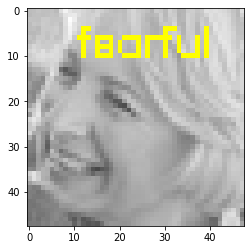

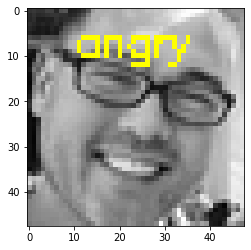

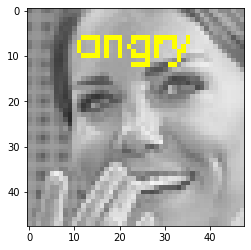

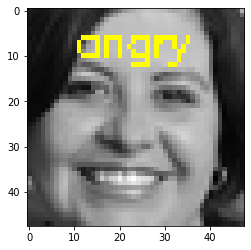

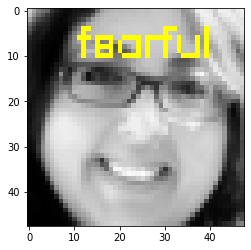

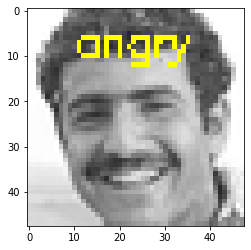

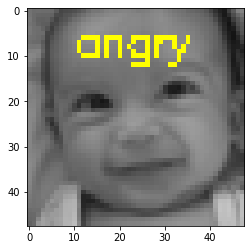

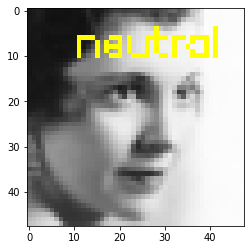

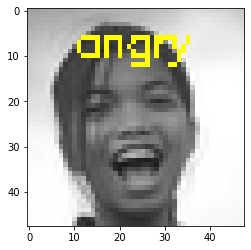

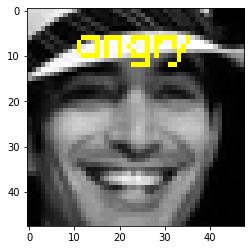

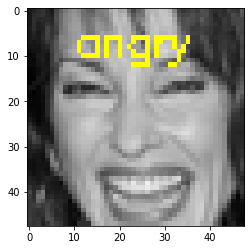

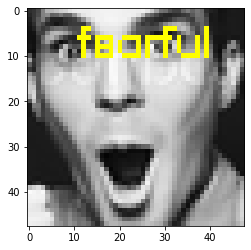

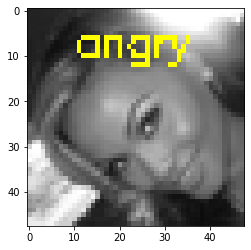

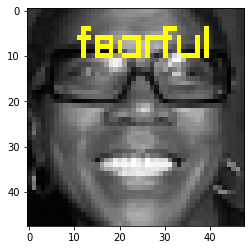

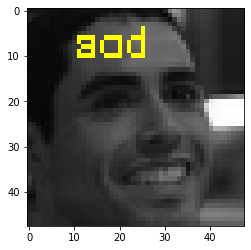

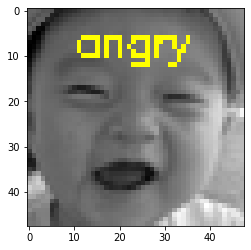

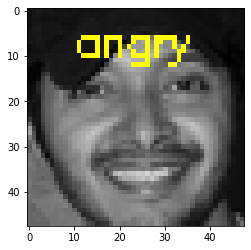

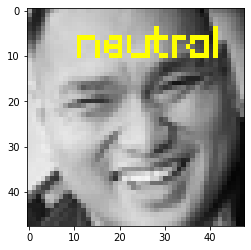

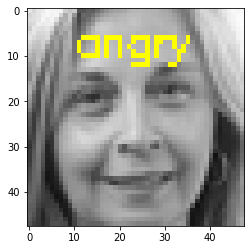

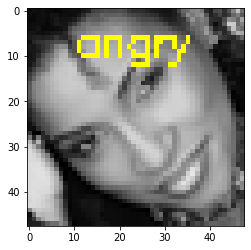

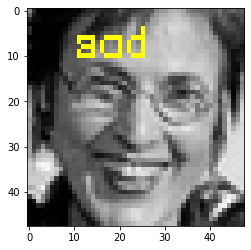

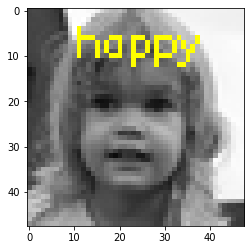

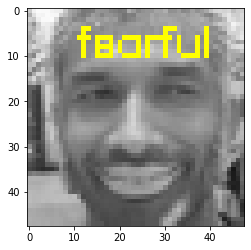

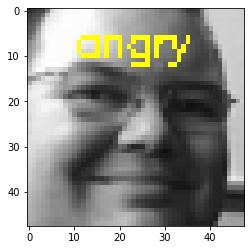

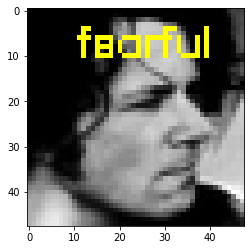

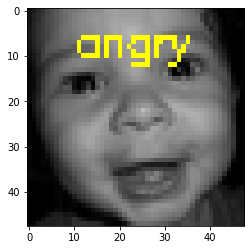

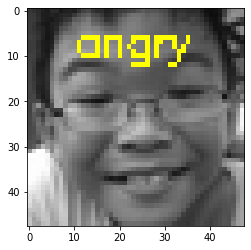

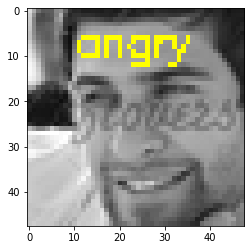

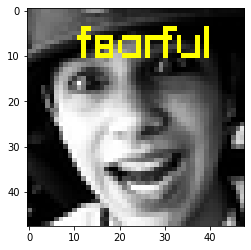

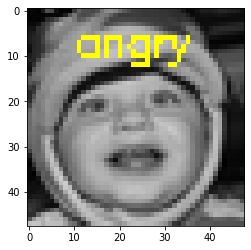

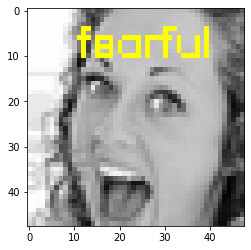

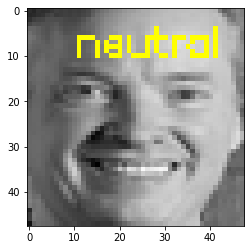

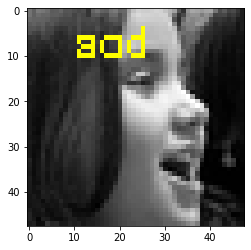

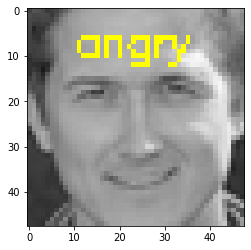

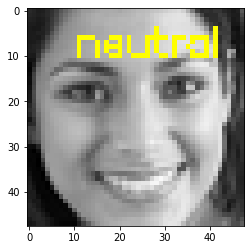

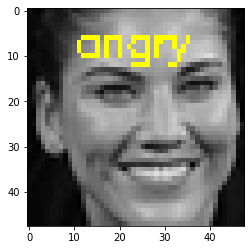

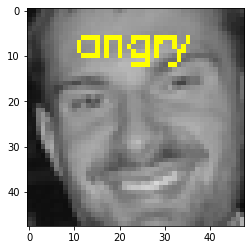

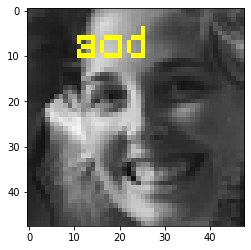

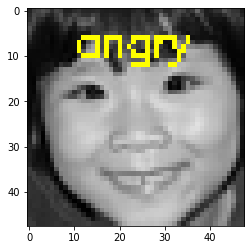

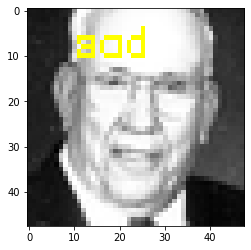

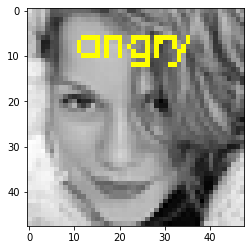

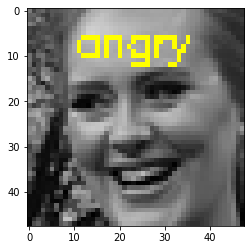

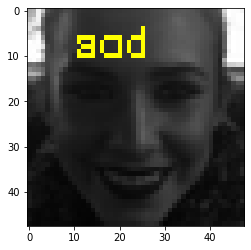

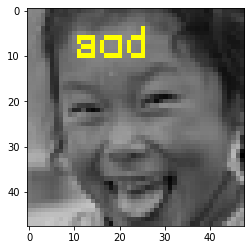

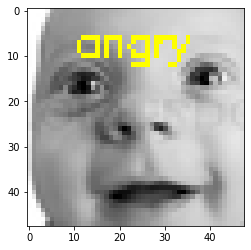

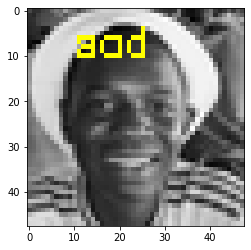

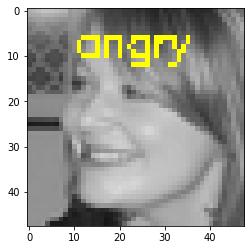

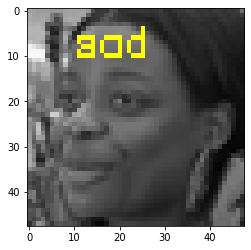

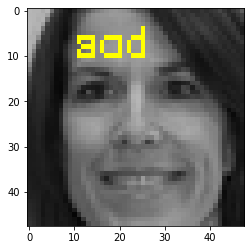

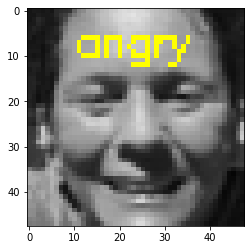

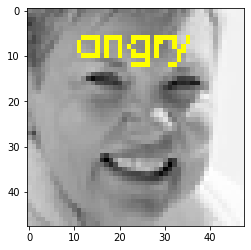

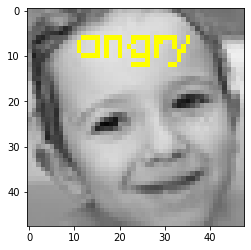

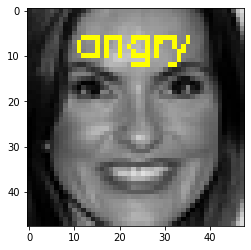

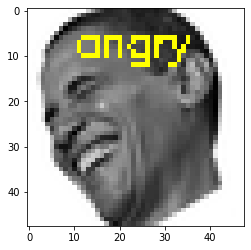

KeyboardInterrupt: 

In [26]:

# path to test data
test_path = "data/test"

# loop through the test images
all_test_files = glob.glob(test_path + "/*/*")
#print(all_test_files)
for file in all_test_files:
#for file in os.listdir(test_path):    

    #file = test_path + "/" + file
    #print(file)
    
    # read the image
    image = cv2.imread(file)

    # resize the image
    image = cv2.resize(image, fixed_size)

    # Global Feature extraction
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)

    # Concatenate global features

    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

    # predict label of test image
    prediction = clf.predict(global_feature.reshape(1,-1))[0]

    # show predicted label on image
    cv2.putText(image, train_labels[prediction], (10,10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,255,255), 1)

    # display the output image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()